In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import torch
import torch.nn as nn
print(f'PyTorch Version: {torch.__version__}')

PyTorch Version: 1.10.0+cu111


# Univariate Linear Regression

## 1-D linear regression problem
- Given one dimensional data, plot the best fitted line

## Goal
- Construct a linear model using PyTorch
- Select the loss function and optimization method
- Train the model using the stochastic gradient descent (SGD) method
- Plot the results and compare the optimized parameters

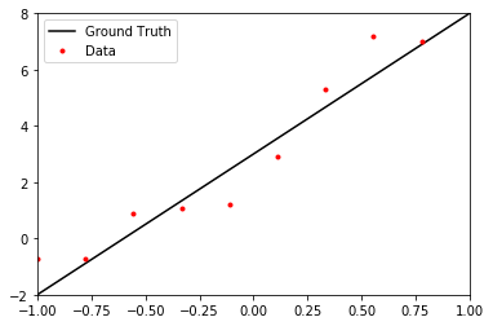

## 1D data generation



- w, b: Linear function parameters
- x_true, y_true: Ground truth linear function
- x_data, y_data: Collected data (In this example, randomly generated data)
- n: number of data points

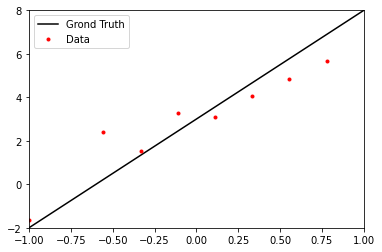

In [ ]:
def f1(x, w, b):
  return w*x + b

w  = 5.
b = 3.  # true values of parameters

x_true = np.linspace(-1, 1, 100)    # start : -1, end : 1, num : 100
y_true = f1(x_true, w, b)           # generate output numpy array 

n = 10
x_data = np.linspace(-1, 1, n)   # start : -1, end : 1, num : n (10)
y_data = f1(x_data, w, b) + np.random.randn(n)  # adding Gaussian noise

plt.plot(x_true, y_true, "k-", label="Grond Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.legend()
plt.xlim([-1, 1])
plt.ylim([-2, 8])
plt.show()


## Transforming data from numpy to pytorch tensors

- Numpy array: 

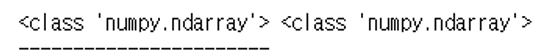

- Tensor: 

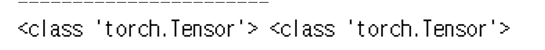

In [ ]:
# Data currently as numpy
print(type(x_data), type(y_data))
print('-----------------------')

# Transform numpy datatypes to pytorch tensors

############# COMPLETE THE CODE BELOW #############
x_data_tensor = torch.from_numpy(x_data.astype(np.float32))
y_data_tensor = torch.from_numpy(y_data.astype(np.float32))
print(type(x_data_tensor), type(y_data_tensor))
print("-----------------------")

print(x_data_tensor.shape, y_data_tensor.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
-----------------------
<class 'torch.Tensor'> <class 'torch.Tensor'>
-----------------------
torch.Size([10]) torch.Size([10])


(A) torch.from_numpy(x_data.astype(np.float32))
(B) torch.from_numpy(y_data.astype(np.float32))

In [ ]:
# In order to use the in-built pytorch models, we need to convert the tensors into 2d arrays
############# COMPLETE THE CODE BELOW #############
x_data_tensor = x_data_tensor.view(-1, 1)   #torch.view(a,b) : reshape the tensor to a*b, -1 : inferred from other dimension (in this line, it is 10 / 1 = 10)
y_data_tensor = y_data_tensor.view(-1, 1)
###################################################

print(x_data_tensor.shape, y_data_tensor.shape)

torch.Size([10, 1]) torch.Size([10, 1])


(A) x_data_tensor.view(-1,1)
(B) y_data_tensor.view(-1,1)

**tensor.view(): Reshape function

## Create linear model

- Use PyTorch's built-in function nn.Linear()
- We need to determine input/output size for the linear model
- We can easily access to weight and bias value via model.weight and model.bias functions

In [ ]:
# First, specify number of dimensions for both input and output data

############# COMPLETE THE CODE BELOW #############
input_size = 1
output_size = 1
###################################################

model = nn.Linear(input_size, output_size)  # nn : torch.nn

# The linear model initializes its weight and bias values randomly
# torch.manual_seed(1) for fixed initialization
print(model.weight)
print(model.bias)
print('-----------------------')

Parameter containing:
tensor([[-0.6347]], requires_grad=True)
Parameter containing:
tensor([0.9515], requires_grad=True)
-----------------------


- Checkout that .item() function can be used only when a single number extracted from tensor

In [ ]:
# Remember, we can print out only the values in the following way

############# COMPLETE THE CODE BELOW #############
weight = model.weight[0, 0].item()
bias = model.bias[0].item()
###################################################

print(f'Weight: {weight:.5f}\tBias: {bias:.5f}')
print("Weight: " + str(model.weight[0,0]) + "\tBias: " + str(model.bias[0])) #need item() to convert tensor to float

Weight: -0.63473	Bias: 0.95146
Weight: tensor(-0.6347, grad_fn=<SelectBackward0>)	Bias: tensor(0.9515, grad_fn=<SelectBackward0>)


(A) model.weight[0,0].item()
(B) model.bias[0].item()

## Set loss and optimizing methods

- Learning rate is used for optimizer (SGD)
- Mean Square Error(MSE) loss is used in this code

In [ ]:
# For linear regression, we will use the mean squared error loss and optimize the model using the stochastic gradient descent method
learning_rate = 0.01
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Training the model

- Forward pass:
  - Input: Tensor
  - Output: Tensor

** If you rerun this cell several times, you can reupdate the parameters

In [ ]:
# Set the number of epochs
num_epochs = 1000

for epoch in range(num_epochs):
    
    ############# COMPLETE THE CODE BELOW #############
    # Compute forward pass
    y_pred_tensor = model(x_data_tensor)
    
    # Compute loss (The computed loss is a tensor!)
    loss = loss_method(y_pred_tensor, y_data_tensor)
    ###################################################
    
    # Compute backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    optimizer.zero_grad() # IMPORTANT: Do not forget this step to reset the gradients to zero!
    
    # Print progress
    if (epoch + 1) % 50 == 0:
        print(f'Epoch: {epoch+1}\tLoss = {loss.item():.5f}')

Epoch: 50	Loss = 6.68695
Epoch: 100	Loss = 3.45262
Epoch: 150	Loss = 2.15928
Epoch: 200	Loss = 1.60635
Epoch: 250	Loss = 1.36472
Epoch: 300	Loss = 1.25841
Epoch: 350	Loss = 1.21155
Epoch: 400	Loss = 1.19087
Epoch: 450	Loss = 1.18175
Epoch: 500	Loss = 1.17773
Epoch: 550	Loss = 1.17595
Epoch: 600	Loss = 1.17517
Epoch: 650	Loss = 1.17482
Epoch: 700	Loss = 1.17467
Epoch: 750	Loss = 1.17460
Epoch: 800	Loss = 1.17457
Epoch: 850	Loss = 1.17456
Epoch: 900	Loss = 1.17455
Epoch: 950	Loss = 1.17455
Epoch: 1000	Loss = 1.17455


- (A) model(x_data_tensor)
- (B) loss_method(y_pred_tensor, y_data_tensor)

## Plotting the results

Original parameters: w = 5.0, b = 3.0
Trained parameters: w = 4.60130, b = 2.85394


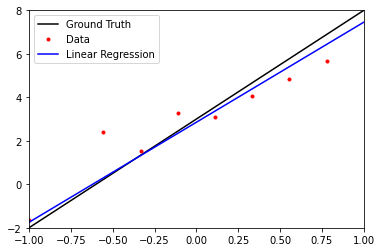

In [ ]:
# Change the numpy array x_true to a 2d tensor

x_true_tensor = torch.from_numpy(x_true.astype(np.float32)).view(-1,1)

# Obtain the predicted results in the numpy datatype

y_pred_tensor = model(x_true_tensor).detach() # IMPORTANT: Remember to remove this variable from the computational graph!
y_pred = y_pred_tensor.numpy()

# Check the trained model's parameters
print(f'Original parameters: w = {w}, b = {b}')

############# COMPLETE THE CODE BELOW #############
weight = model.weight[0, 0].item()
bias = model.bias[0].item()
###################################################

print(f'Trained parameters: w = {weight:.5f}, b = {bias:.5f}')

# Plot the results
plt.plot(x_true, y_true, "k-", label="Ground Truth")         # blac'k' line
plt.plot(x_data, y_data, "r.", label="Data")                 # red dot
plt.plot(x_true, y_pred, "b-", label="Linear Regression")    # 'b'lue line
plt.legend()
plt.xlim([-1, 1])
plt.ylim([-2, 8])
plt.show()

- (A) model.weight[0,0].item()
- (B) model.bias[0].item()



---



---



# Multivariate Linear Regression

2D Linear regression problem
- Given two dimensional data, plot the best fitted surface

Goal
- Construct a linear model using PyTorch
- Select the loss function and optimization method
- Train the model using the stochastic gradient descent (SGD) method
- Plot the results and compare the optimized parameters

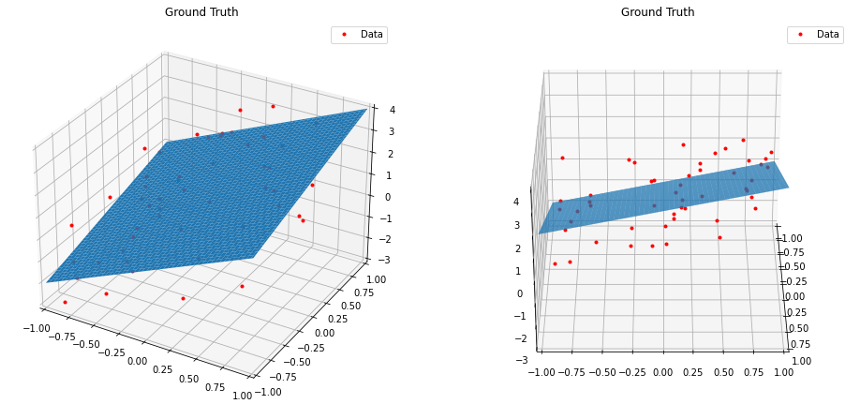

## 2D data generation

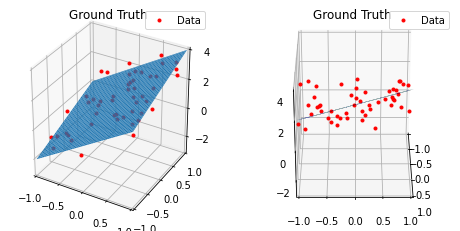

In [ ]:
def f2(x, w, b):
  return np.matmul(x, w) + b

w = np.asarray([[2.],[1.]])
b = 1.
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1, x2) 
x_true = np.concatenate([np.reshape(X1, [-1, 1]), np.reshape(X2, [-1, 1])], axis=1)
#print(x_true)
y_true = f2(x_true, w, b)
Y = np.reshape(y_true, [100, 100])

n = 50
x_data = np.random.uniform(-1, 1, size=(n, 2))
y_data = f2(x_data, w, b) + np.random.randn(n, 1)

fig = plt.figure(figsize=plt.figaspect(0.5))
for i in range(2):
  ax = fig.add_subplot(1, 2, i+1, projection='3d')
  surf = ax.plot_surface(X1, X2, Y) # draw ground_truth surface
  scat = ax.plot3D(x_data[:, 0].flatten(), x_data[:, 1].flatten(), y_data.flatten(), 'r.', label='Data')
  plt.legend()
  ax.set_title("Ground Truth")
  ax.set_xlim3d(-1,1)
  ax.set_ylim3d(-1, 1)
  ax.set_zlim3d(-3, 4)
ax.view_init(30, 0) # change viewpoint of the second figure
plt.draw()
plt.show()

## Transforming data from numpy to pytorch tensors

Hint: use torch.from_numpy() function

In [ ]:
# Data currently as numpy
print(type(x_data), type(y_data))
print('-----------------------')

# Transform numpy datatypes to pytorch tensors

############# COMPLETE THE CODE BELOW #############
x_data_tensor = torch.from_numpy(x_data.astype(np.float32))
y_data_tensor = torch.from_numpy(y_data.astype(np.float32))
###################################################

print(type(x_data_tensor), type(y_data_tensor))
print('-----------------------')

# In this case, the tensors are already 2d arrays!
print(x_data_tensor.shape, y_data_tensor.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
-----------------------
<class 'torch.Tensor'> <class 'torch.Tensor'>
-----------------------
torch.Size([50, 2]) torch.Size([50, 1])


## Create linear model

Hint: use nn.linear() function

In [ ]:
# First, specify number of dimensions for both input and output data

############# COMPLETE THE CODE BELOW #############
input_size = 2
output_size = 1
model = nn.Linear(input_size, output_size)
###################################################

# The linear model initializes its weight and bias values randomly
print(model.weight)
print(model.bias)
print('-----------------------')

# Remember, we can print out only the values in the following way
weight1 = model.weight[0, 0].item()
weight2 = model.weight[0, 1].item()
bias = model.bias[0].item()
print(f'Weight: {weight1:.5f}, {weight2:.5f}\tBias: {bias:.5f}')

Parameter containing:
tensor([[-0.5996,  0.1689]], requires_grad=True)
Parameter containing:
tensor([-0.4171], requires_grad=True)
-----------------------
Weight: -0.59955, 0.16885	Bias: -0.41713


## Set loss and optimizing methods

Use Mean Squre Error (MSE) and Stochastic Gradient Descent (SGD) method

Hint: nn.MSELoss()

In [ ]:
# For linear regression, we will use the mean squared error loss and optimize the model using the stochastic gradient descent method

############# COMPLETE THE CODE BELOW #############
learning_rate = 0.01
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
###################################################

## Training the model

In [ ]:
# Set the number of epochs
num_epochs = 2000

for epoch in range(num_epochs):
    
    ############# COMPLETE THE CODE BELOW #############
    # Compute forward pass
    y_pred_tensor = model(x_data_tensor)
    
    # Compute loss
    loss = loss_method(y_pred_tensor, y_data_tensor)
    
    # Compute backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    optimizer.zero_grad()
    
    ###################################################
    
    # Print progress
    if (epoch + 1) % 200 == 0:
        print(f'Epoch: {epoch+1}\tLoss = {loss.item():.5f}')

Epoch: 200	Loss = 0.86663
Epoch: 400	Loss = 0.75970
Epoch: 600	Loss = 0.75269
Epoch: 800	Loss = 0.75222
Epoch: 1000	Loss = 0.75219
Epoch: 1200	Loss = 0.75219
Epoch: 1400	Loss = 0.75219
Epoch: 1600	Loss = 0.75219
Epoch: 1800	Loss = 0.75219
Epoch: 2000	Loss = 0.75219


## Plotting the results

Original parameters: w = 2.0, 1.0, b = 1.0
Trained parameters: w = 1.99586, 0.50449, b = 1.12997


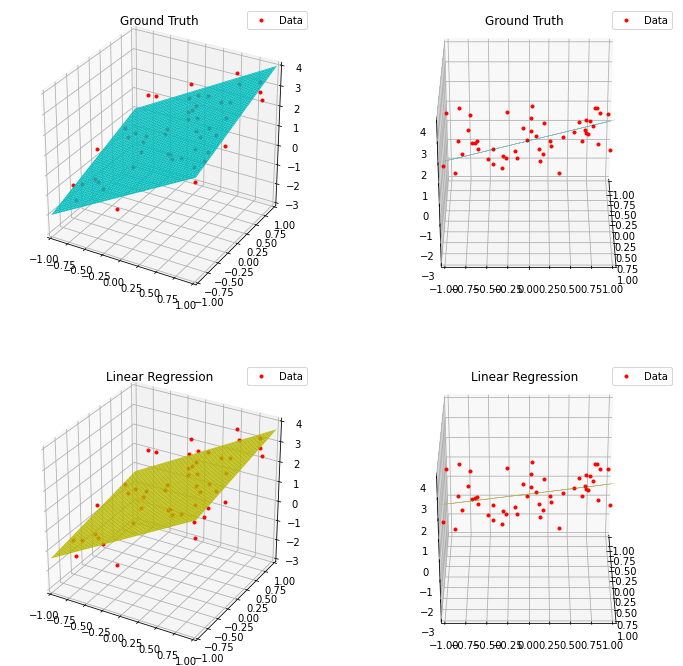

In [ ]:
# Obtain the predicted results in the numpy datatype

############# COMPLETE THE CODE BELOW #############
x_true_tensor = torch.from_numpy(x_true.astype(np.float32))
y_pred_tensor = model(x_true_tensor).detach()
###################################################
y_pred = y_pred_tensor.numpy()


# Check the trained model's parameters
print(f'Original parameters: w = {w[0,0]}, {w[1,0]}, b = {b}')

############# COMPLETE THE CODE BELOW #############
weight1 = model.weight[0, 0].item()
weight2 = model.weight[0, 1].item()
bias = model.bias[0].item()
###################################################

print(f'Trained parameters: w = {weight1:.5f}, {weight2:.5f}, b = {bias:.5f}')

# Compute Y_pred for surface plot
Y_pred = np.reshape(y_pred, [100,100])

# Plot the results
fig = plt.figure(figsize=(12, 12))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    if i < 2:
        ax.set_title("Ground Truth")
        surf = ax.plot_surface(X1, X2, Y, color='c')
    else:
        ax.set_title("Linear Regression")
        pred = ax.plot_surface(X1, X2, Y_pred, color='y')
    scat = ax.plot3D(x_data[:,0].flatten(), x_data[:,1].flatten(), y_data.flatten(), 'r.', label="Data")
    plt.legend()
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-3,4)
    if i % 2 == 1:
        ax.view_init(30, 0)
        plt.draw()
plt.show()

## Normal Equations
$w^* = (X^TX)^{-1}X^Ty$

Original parameters: w = 2.0, 1.0, b = 1.0
Trained parameters: w = 1.99586, 0.50449, b = 1.12997
Optimal parameters: w = 1.99587, 0.50449, b = 1.12997


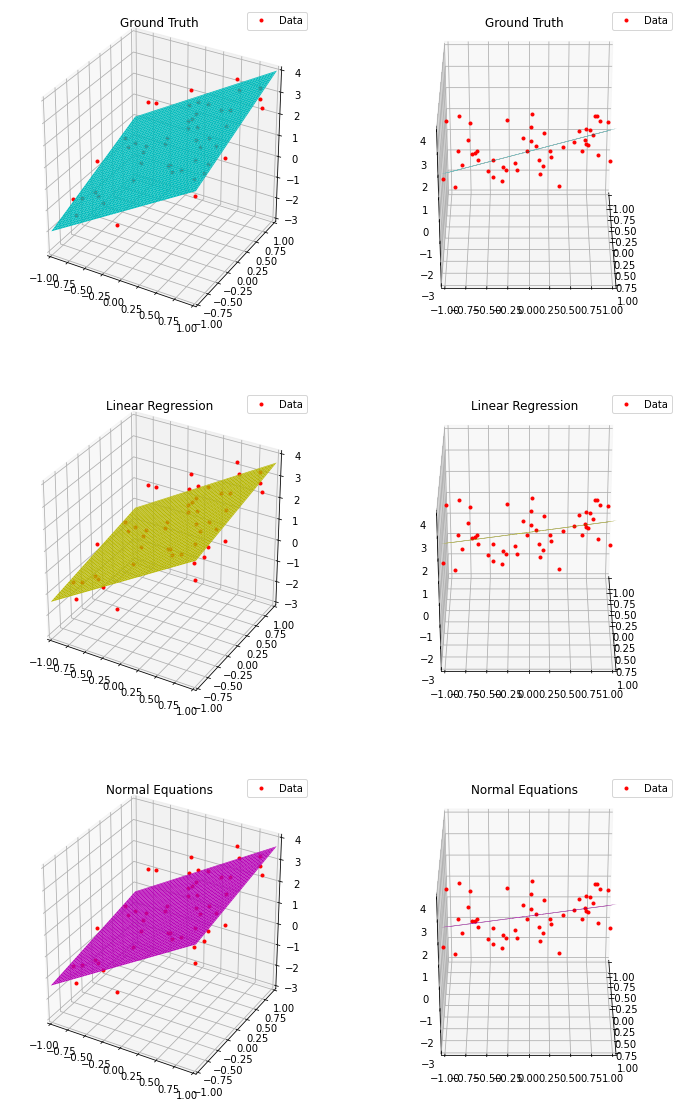

In [ ]:
# Let's compare the results obtained with the analytic method!
X_intercept = np.concatenate([np.ones((x_data.shape[0], 1)), x_data], axis=1)

############# COMPLETE THE CODE BELOW #############
w_optimal = np.linalg.inv(X_intercept.T @ X_intercept)@X_intercept.T@y_data
###################################################

print(f'Original parameters: w = {w[0,0]}, {w[1,0]}, b = {b}')
print(f'Trained parameters: w = {weight1:.5f}, {weight2:.5f}, b = {bias:.5f}')
print(f'Optimal parameters: w = {w_optimal[1,0]:.5f}, {w_optimal[2,0]:.5f}, b = {w_optimal[0,0]:.5f}')

# Compute Y_normal for surface plot
y_normal = f2(x_true, w_optimal[1:,0], w_optimal[0,0])
Y_normal = np.reshape(y_normal, [100,100])

# Plot the results
fig = plt.figure(figsize=(12, 20))
for i in range(6):
    ax = fig.add_subplot(3, 2, i+1, projection='3d')
    if i < 2:
        ax.set_title("Ground Truth")
        surf = ax.plot_surface(X1, X2, Y, color='c')
    elif i < 4:
        ax.set_title("Linear Regression")
        pred = ax.plot_surface(X1, X2, Y_pred, color='y')
    else:
        ax.set_title("Normal Equations")
        normal = ax.plot_surface(X1, X2, Y_normal, color='m')
    scat = ax.plot3D(x_data[:,0].flatten(), x_data[:,1].flatten(), y_data.flatten(), 'r.', label="Data")
    plt.legend()
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-3,4)
    if i % 2 == 1:
        ax.view_init(30, 0)
        plt.draw()
plt.show()



---



---


# General Linear Regression (Non-linear Regression)

- Given data generated from a non-linear function, plot the best fitted curve

Goal
- Construct the kernel matrix 
- Construct a linear model using PyTorch


## Non-linear 1D data generation

- Generating noisy data from the given function


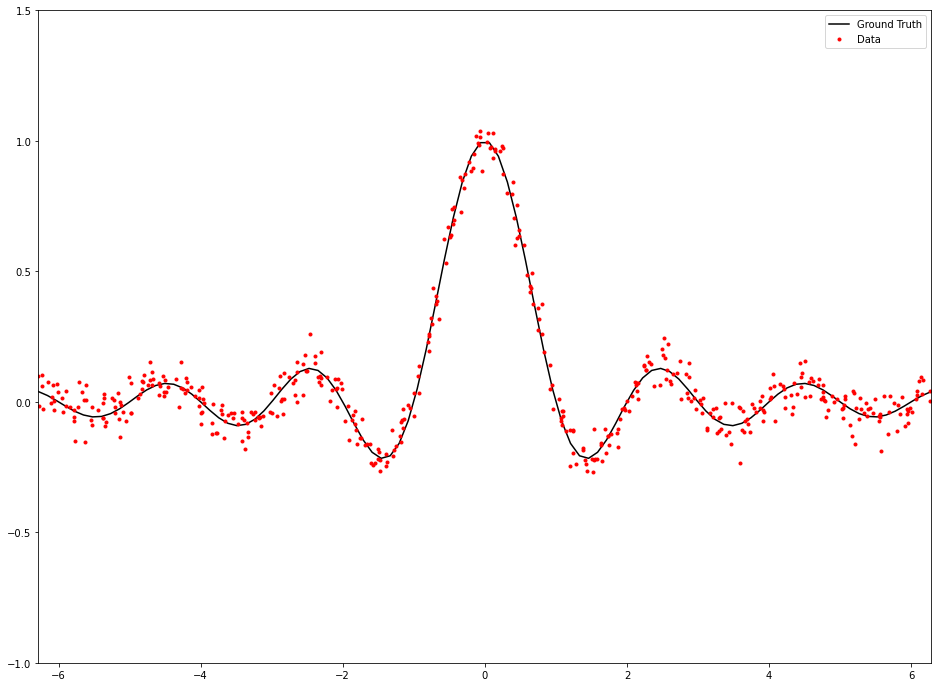

In [ ]:
def f3(x):
    return np.sinc(x)

x_true = np.linspace(-2*np.pi, 2*np.pi, 100)
y_true = f3(x_true)

n = 500
x_data = np.linspace(-2*np.pi, 2*np.pi, n) + 0.05*np.random.randn(n)
y_data = f3(x_data) + 0.05*np.random.randn(n)

plt.figure(figsize=(16,12))
plt.plot(x_true, y_true, "k-", label="Ground Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.legend()
plt.xlim([-2*np.pi, 2*np.pi])
plt.ylim([-1, 1.5])
plt.show()

## Construct the kernel matrix

- Compute kernel matrix

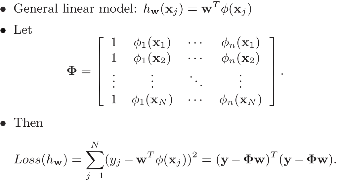

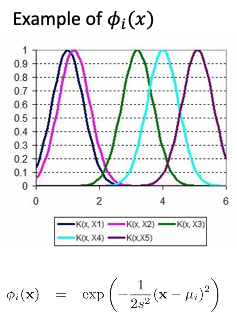

In [ ]:
# Set fixed variables
n_kernel = 20
mu = np.linspace(-2*np.pi, 2*np.pi, n_kernel) # 20 even spaces throughout domain
inv_squared_s = 1e1

# Construct the kernel matrix
def kernelize_vanilla(x_data, n_kernel, mu, inv_squared_s):
    n_samples = len(x_data)
    out = np.zeros((n_samples, n_kernel)) # No need to add intercept since our pytorch linear model does it for us!
    
    ############## COMPLETE THE CODE BELOW #############
    for j in range(n_samples):
        x_j = x_data[j]
        for i in range(n_kernel):
            mu_i = mu[i]
            out[j, i] += np.exp((-inv_squared_s/2) * np.square(x_j - mu_i))
    ###################################################
    
    return out

# Construct the kernel matrix with broadcasting
def kernelize(x_data, n_kernel, mu, inv_squared_s):
    n_samples = len(x_data)
    out1 = np.square(x_data).reshape(n_samples,-1)
    out2 = x_data.reshape(n_samples,-1).dot(mu.reshape(1,-1))
    out3 = np.square(mu.reshape(1,-1))
    D_matrix = out1 - 2*out2 + out3
    out = -inv_squared_s*(D_matrix)/2
    assert out.shape == (n_samples, n_kernel)
    return np.exp(out)

import time
def measure_time(function):
    start_time = time.time()
    result = function
    end_time = time.time()
    return (end_time - start_time, result)

time1, temp1 = measure_time(kernelize_vanilla(x_data, n_kernel, mu, inv_squared_s))
time2, temp2 = measure_time(kernelize(x_data, n_kernel, mu, inv_squared_s))
err = np.sum(np.abs(temp1 - temp2))
print(f'Vanilla implementation: {time1:.10f}s')
print(f'Vectorized implementation: {time2:.10f}s')
print(f'Relative error: {err}')

# Now, we "kernelize" the data input data
x_data_kernel = kernelize(x_data, n_kernel, mu, inv_squared_s)

Vanilla implementation: 0.0000007153s
Vectorized implementation: 0.0000002384s
Relative error: 3.652472739602849e-12


## Transforming data from numpy to pytorch tensors

In [ ]:
# Data currently as numpy
print(type(x_data_kernel), type(y_data))
print('-----------------------')

# Transform numpy datatypes to pytorch tensors

############# COMPLETE THE CODE BELOW #############
x_data_tensor = torch.from_numpy(x_data_kernel.astype(np.float32))
y_data_tensor = torch.from_numpy(y_data.astype(np.float32))
###################################################

print(type(x_data_tensor), type(y_data_tensor))
print('-----------------------')

# In order to use the in-built pytorch models, we need to convert the tensors into 2d arrays
print(x_data_tensor.shape, y_data_tensor.shape)

############# COMPLETE THE CODE BELOW #############
y_data_tensor = y_data_tensor.view(-1, 1)
###################################################

print(x_data_tensor.shape, y_data_tensor.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
-----------------------
<class 'torch.Tensor'> <class 'torch.Tensor'>
-----------------------
torch.Size([500, 20]) torch.Size([500])
torch.Size([500, 20]) torch.Size([500, 1])


## Create linear model

In [ ]:
# First, specify number of dimensions for both input and output data

############# COMPLETE THE CODE BELOW #############
input_size = n_kernel
output_size = 1
model = nn.Linear(input_size, output_size)
###################################################

# The linear model initializes its weight and bias values randomly
print(model.weight)
print(model.bias)
print('-----------------------')

# Remember, we can print out only the values in the following way
weight = []
for i in range(n_kernel):
    weight.append(model.weight[0,i].item())
    if i%5==0:
        print(f'Weight: {weight[i]:.5f}', end=',\t')
    elif i%5==4:
        print(f'{weight[i]:.5f}')
    else:
        print(f'{weight[i]:.5f}', end=',\t')
bias = model.bias[0].item()
print(f'Bias: {bias:.5f}')

Parameter containing:
tensor([[ 0.0109,  0.0896,  0.1571,  0.0814,  0.0237,  0.2178, -0.1212,  0.0103,
         -0.2000, -0.0228, -0.1753,  0.0911,  0.0984,  0.1271, -0.0734, -0.0933,
          0.0750,  0.1760, -0.2036, -0.0443]], requires_grad=True)
Parameter containing:
tensor([0.0234], requires_grad=True)
-----------------------
Weight: 0.01094,	0.08965,	0.15706,	0.08142,	0.02372
Weight: 0.21780,	-0.12122,	0.01026,	-0.19996,	-0.02283
Weight: -0.17532,	0.09112,	0.09844,	0.12709,	-0.07336
Weight: -0.09333,	0.07504,	0.17601,	-0.20356,	-0.04430
Bias: 0.02336


## Set loss and optimizing methods

In [ ]:
# For linear regression, we will use the mean squared error loss and optimize the model using the stochastic gradient descent method

############# COMPLETE THE CODE BELOW #############
learning_rate = 0.01
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
###################################################

## Training the model

In [ ]:
# Set the number of epochs
num_epochs = 2000

for epoch in range(num_epochs):
    
    ############# COMPLETE THE CODE BELOW #############
    # Compute forward pass
    y_pred_tensor = model(x_data_tensor)
    
    # Compute loss
    loss = loss_method(y_pred_tensor, y_data_tensor)
    
    # Compute backward pass
    loss.backward()
    
    # Update parameters (Remember to reset gradients!)
    optimizer.step()
    optimizer.zero_grad()
    
    ###################################################
    
    # Print progress
    if (epoch + 1) % 200 == 0:
        print(f'Epoch: {epoch+1}\tLoss = {loss.item():.5f}')

Epoch: 200	Loss = 0.06987
Epoch: 400	Loss = 0.04583
Epoch: 600	Loss = 0.03081
Epoch: 800	Loss = 0.02132
Epoch: 1000	Loss = 0.01523
Epoch: 1200	Loss = 0.01129
Epoch: 1400	Loss = 0.00869
Epoch: 1600	Loss = 0.00696
Epoch: 1800	Loss = 0.00579
Epoch: 2000	Loss = 0.00498


## Plotting the results

Trained parameters:
Weight: -0.01843,	-0.07872,	-0.01551,	0.01522,	-0.15367
Weight: 0.01639,	-0.00371,	-0.16654,	-0.11356,	0.69237
Weight: 0.59985,	-0.02448,	-0.23350,	0.09510,	-0.05325
Weight: -0.13265,	0.00066,	0.00204,	-0.15724,	-0.00201
Bias: 0.06177


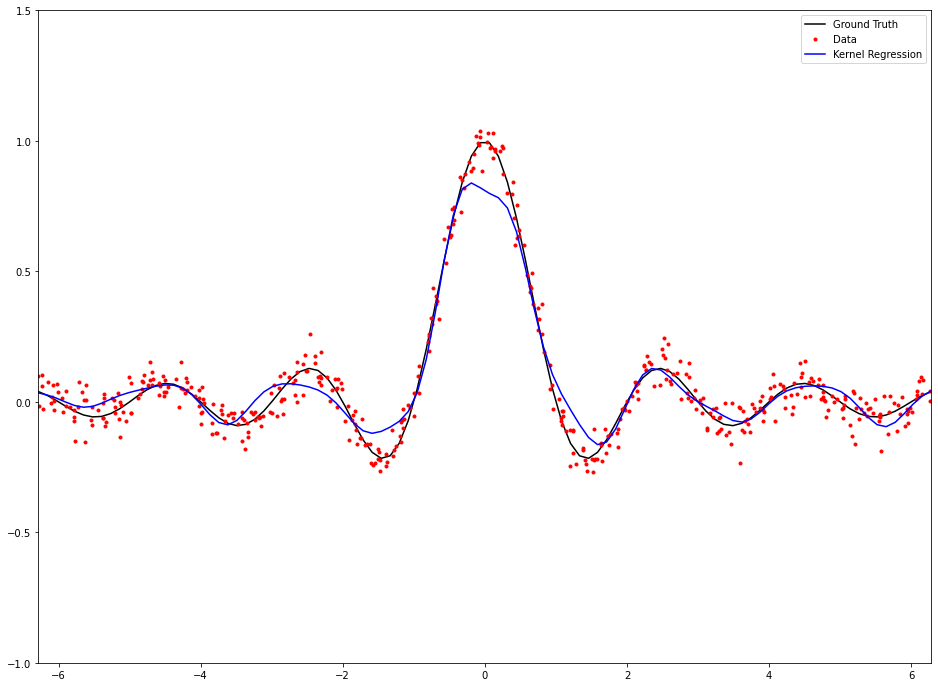

In [ ]:
# Obtain the predicted results in the numpy datatype

############# COMPLETE THE CODE BELOW #############
x_true_kernel = kernelize(x_true, n_kernel, mu, inv_squared_s)
x_true_tensor = torch.from_numpy(x_true_kernel.astype(np.float32))
y_pred_tensor = model(x_true_tensor).detach()
y_pred = y_pred_tensor.numpy()
###################################################

# Check the trained model's parameters
print('Trained parameters:')
weight = []
for i in range(n_kernel):
    weight.append(model.weight[0,i].item())
    if i%5==0:
        print(f'Weight: {weight[i]:.5f}', end=',\t')
    elif i%5==4:
        print(f'{weight[i]:.5f}')
    else:
        print(f'{weight[i]:.5f}', end=',\t')
bias = model.bias[0].item()
print(f'Bias: {bias:.5f}')

# Plot the results
plt.figure(figsize=(16, 12))
plt.plot(x_true, y_true, "k-", label="Ground Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.plot(x_true, y_pred, "b-", label="Kernel Regression")
plt.legend()
plt.xlim([-2*np.pi, 2*np.pi])
plt.ylim([-1, 1.5])
plt.show()